# INTENTO CON NOMBRE DE ENZIMA Y COMPUESTOS

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#parsear XML
import csv   
from lxml import etree
#Parsear HTML
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4.builder import HTMLParserTreeBuilder

#Parsear HTML
import os

import keggpathx as kp

## Ciclos

2


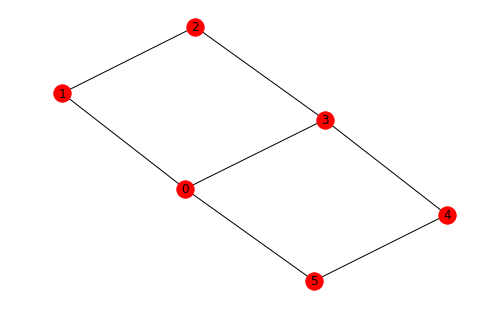

In [8]:
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [0, 3, 4, 5])
nx.draw(G, with_labels=True)
print(len(nx.cycle_basis(G)) )

2

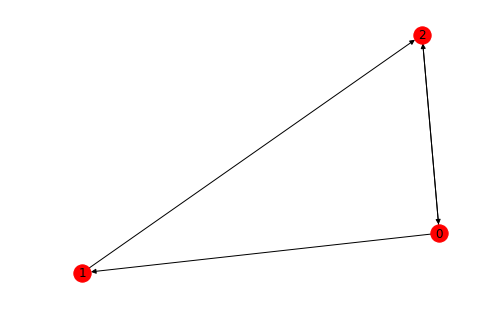

In [12]:
edges = [(0, 1), (0, 2), (1, 2), (2, 0)]
G = nx.DiGraph(edges)
nx.draw(G,with_labels=True)
len(list(nx.simple_cycles(G)))

# ------

In [2]:
org=[['sai','01100'],
     ['tac','01100'],
     ['eco','01040'],
     ['hsa','01040'],
     ['ptr','01040'],
     ['ath','01040'],
     ['mmu','01040'],
     ['cac','01100'],
     ['cel','01040'],
     ['dme','01040'],
     ['lma','01040'],
     ['sce','01040'],
     ['sfx','01040']]

for i in org:
    locals()['G_'+str(i[0])], locals()['NODOS_'+str(i[0])], locals()['EDGES_'+str(i[0])] =kp.net_label(i[0],i[1])   


# COMIENZO CODIGO

In [6]:
org=[#['sai','01100']]
     #['tac','01100']]
     #['eco','01040']]
     #['hsa','01040']]
     ['ptr','01040']]
     #['ath','01040']]
     #['mmu','01040']]
     #['cac','01100'],
     #['cel','01040'],
     #['dme','01040']]
     #['lma','01040']]
     #['sce','01040'],
     #['sfx','01040']]
    
for o in org:  
    
    locals()['Bipartita_'+str(o[0])] = pd.DataFrame(columns=('Origen', 'Destino')) # Crear tabla csv. 
    locals()['Bipartita_'+str(o[0])].to_csv('Bipartita_'+o[0]+'.csv', sep=';') 
    
    save=len(pd.read_csv('Bipartita_'+o[0]+'.csv',index_col=0, delimiter=';')[['Origen']].values)
       
    nodos=[]
    for n in locals()['G_'+str(o[0])].nodes:
        nodos.append(n)
    
    NODOS=[]
    for N in nodos:
        n=N.replace('[','').replace(']','').find('EC')
        enz=N.replace('[','').replace(']','')[n:]
        NODOS.append([N,enz])
    
    m=0
   
    for i in NODOS:
    #    m=m+1
        
    #    if m > save:
        base='https://www.genome.jp/dbget-bin/www_bget?'
        comp=i[1]
        url=base+comp
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")
        
            
            
        if soup.text.find('No such data was found') == -1: #si -1 la palabra que estamos buscando no esta. 
            n=soup.tr.td.find_all('table')[3].find_all('td')[4].text.find(';')
            clase=soup.tr.td.find_all('table')[3].find_all('td')[4].text[:n]
                
            if len(soup.tr.td.find_all('table')[3].find_all('td')) > 8:
                    
                long=len(soup.tr.td.find_all('table')[3].find_all('td')[8].text.split('\n'))
                
                
                for i in range(0,long-1):
                    m=m+1
                    if m > save: 
                        nomb=soup.tr.td.find_all('table')[3].find_all('td')[8].text.split('\n')[i]#.split('[')[0]
                    
                    
                        NewDat = [ comp , nomb ]
                        print(NewDat)
                    
                        with open(r'Bipartita_'+o[0]+'.csv', 'a' , newline='') as f:
                            writer = csv.writer(f,delimiter=';')
                            writer.writerow(NewDat)
                    
                    

                long=len(soup.tr.td.find_all('table')[3].find_all('td')[9].text.split('\n'))
  
                for i in range(0,long-1):
                    m=m+1
                    if m > save:
                        nomb=soup.tr.td.find_all('table')[3].find_all('td')[9].text.split('\n')[i]#.split('[')[0]
                    
                
                        NewDat = [ nomb , comp ]  
                        print(NewDat)
                        
                        with open(r'Bipartita_'+o[0]+'.csv', 'a' , newline='') as f:
                            writer = csv.writer(f,delimiter=';')
                            writer.writerow(NewDat)
                            
                
                

        
                
                
                
                
                
        
            print(m)
    

['EC:5.1.3.3', 'alpha-D-glucose [CPD:C00267]']
['beta-D-glucose [CPD:C00221]', 'EC:5.1.3.3']
2
['EC:2.7.1.1', 'ATP [CPD:C00002];']
['EC:2.7.1.1', 'D-hexose [CPD:C00738]']
['ADP [CPD:C00008];', 'EC:2.7.1.1']
['D-hexose 6-phosphate [CPD:C02965]', 'EC:2.7.1.1']
6
['EC:2.7.1.2', 'ATP [CPD:C00002];']
['EC:2.7.1.2', 'D-glucose [CPD:C00031]']
['ADP [CPD:C00008];', 'EC:2.7.1.2']
['D-glucose 6-phosphate [CPD:C00092]', 'EC:2.7.1.2']
10
['EC:3.1.3.9', 'D-glucose 6-phosphate [CPD:C00092];']
['EC:3.1.3.9', 'H2O [CPD:C00001]']
['D-glucose [CPD:C00031];', 'EC:3.1.3.9']
['phosphate [CPD:C00009]', 'EC:3.1.3.9']
14
['EC:5.3.1.9', 'D-glucose 6-phosphate [CPD:C00092]']
['D-fructose 6-phosphate [CPD:C00085]', 'EC:5.3.1.9']
16
['EC:5.4.2.2', 'alpha-D-glucose 1-phosphate [CPD:C00103]']
['D-glucose 6-phosphate [CPD:C00092]', 'EC:5.4.2.2']
18
['EC:3.1.3.11', 'D-fructose 1,6-bisphosphate [CPD:C00354];']
['EC:3.1.3.11', 'H2O [CPD:C00001]']
['D-fructose 6-phosphate [CPD:C00085];', 'EC:3.1.3.11']
['phosphate [CPD:

['H+ [CPD:C00080];', 'EC:1.1.1.42']
['oxalosuccinate [CPD:C05379]', 'EC:1.1.1.42']
182
['EC:4.2.1.3', 'citrate [CPD:C00158];']
['EC:4.2.1.3', 'cis-aconitate [CPD:C00417];']
['EC:4.2.1.3', 'H2O [CPD:C00001]']
['isocitrate [CPD:C00311];', 'EC:4.2.1.3']
['cis-aconitate [CPD:C00417];', 'EC:4.2.1.3']
['H2O [CPD:C00001]', 'EC:4.2.1.3']
188
['EC:2.7.1.12', 'ATP [CPD:C00002];']
['EC:2.7.1.12', 'D-gluconate [CPD:C00257]']
['ADP [CPD:C00008];', 'EC:2.7.1.12']
['6-phospho-D-gluconate [CPD:C00345]', 'EC:2.7.1.12']
192
['EC:3.1.1.17', 'D-glucono-1,5-lactone [CPD:C00198];']
['EC:3.1.1.17', 'H2O [CPD:C00001]']
['D-gluconate [CPD:C00257]', 'EC:3.1.1.17']
195
['EC:1.1.1.44 1.1.1.343', '6-phospho-D-gluconate [CPD:C00345];']
['EC:1.1.1.44 1.1.1.343', 'NADP+ [CPD:C00006]']
['D-ribulose 5-phosphate [CPD:C00199];', 'EC:1.1.1.44 1.1.1.343']
['CO2 [CPD:C00011];', 'EC:1.1.1.44 1.1.1.343']
['NADPH [CPD:C00005];', 'EC:1.1.1.44 1.1.1.343']
['H+ [CPD:C00080]', 'EC:1.1.1.44 1.1.1.343']
201
['EC:3.1.1.31', '6-phosph

['EC:3.2.1.48 3.2.1.10', 'This enzyme is isolated from intestinal mucosa as a single polypeptide chain that also displays activity towards isomaltose (EC 3.2.1.10 oligo-1,6-glucosidase).']
['EC 3.2.1.48 created 1972', 'EC:3.2.1.48 3.2.1.10']
343
['EC:2.7.1.6', 'ATP [CPD:C00002];']
['EC:2.7.1.6', 'alpha-D-galactose [CPD:C00984]']
['ADP [CPD:C00008];', 'EC:2.7.1.6']
['alpha-D-galactose 1-phosphate [CPD:C00446]', 'EC:2.7.1.6']
347
['EC:1.13.99.1', 'myo-inositol [CPD:C00137];']
['EC:1.13.99.1', 'O2 [CPD:C00007]']
['D-glucuronate [CPD:C00191];', 'EC:1.13.99.1']
['H2O [CPD:C00001]', 'EC:1.13.99.1']
351
['EC:2.3.1.85', 'acetyl-CoA [CPD:C00024];']
['EC:2.3.1.85', 'malonyl-CoA [CPD:C00083];']
['EC:2.3.1.85', 'NADPH [CPD:C00005];']
['EC:2.3.1.85', 'H+ [CPD:C00080]']
['long-chain fatty acid [CPD:C00638];', 'EC:2.3.1.85']
['CoA [CPD:C00010];', 'EC:2.3.1.85']
['CO2 [CPD:C00011];', 'EC:2.3.1.85']
['NADP+ [CPD:C00006]', 'EC:2.3.1.85']
359
['EC:6.4.1.2 6.3.4.14 2.1.3.15', 'ATP [CPD:C00002];']
['EC:6.4

['EC:4.1.3.4', '(S)-3-hydroxy-3-methylglutaryl-CoA [CPD:C00356]']
['acetyl-CoA [CPD:C00024];', 'EC:4.1.3.4']
['acetoacetate [CPD:C00164]', 'EC:4.1.3.4']
501
['EC:1.1.1.30', '(R)-3-hydroxybutanoate [CPD:C01089];']
['EC:1.1.1.30', 'NAD+ [CPD:C00003]']
['acetoacetate [CPD:C00164];', 'EC:1.1.1.30']
['NADH [CPD:C00004];', 'EC:1.1.1.30']
['H+ [CPD:C00080]', 'EC:1.1.1.30']
506
['EC:2.8.3.5', 'succinyl-CoA [CPD:C00091];']
['EC:2.8.3.5', '3-oxo acid [CPD:C01656]']
['succinate [CPD:C00042];', 'EC:2.8.3.5']
['3-oxoacyl-CoA [CPD:C00264]', 'EC:2.8.3.5']
510
['EC:2.3.3.10', 'acetyl-CoA [CPD:C00024];']
['EC:2.3.3.10', 'H2O [CPD:C00001];']
['EC:2.3.3.10', 'acetoacetyl-CoA [CPD:C00332]']
['(S)-3-hydroxy-3-methylglutaryl-CoA [CPD:C00356];', 'EC:2.3.3.10']
['CoA [CPD:C00010]', 'EC:2.3.3.10']
515
['EC:1.14.14.154 1.14.15.36', '14alpha-methylsteroid [CPD:C21918];']
['EC:1.14.14.154 1.14.15.36', '[reduced NADPH---hemoprotein reductase] [CPD:C03024];']
['EC:1.14.14.154 1.14.15.36', 'O2 [CPD:C00007];']
['EC:1

['EC:1.14.14.23', 'cholesterol [CPD:C00187];']
['EC:1.14.14.23', '[reduced NADPH---hemoprotein reductase] [CPD:C03024];']
['EC:1.14.14.23', 'O2 [CPD:C00007]']
['7alpha-hydroxycholesterol [CPD:C03594];', 'EC:1.14.14.23']
['[oxidized NADPH---hemoprotein reductase] [CPD:C03161];', 'EC:1.14.14.23']
['H2O [CPD:C00001]', 'EC:1.14.14.23']
668
['EC:1.1.1.181', 'cholest-5-ene-3beta,7alpha-diol [CPD:C03594];']
['EC:1.1.1.181', 'NAD+ [CPD:C00003]']
['7alpha-hydroxycholest-4-en-3-one [CPD:C05455];', 'EC:1.1.1.181']
['NADH [CPD:C00004];', 'EC:1.1.1.181']
['H+ [CPD:C00080]', 'EC:1.1.1.181']
673
['EC:1.14.18.8 1.14.14.139', '7alpha-hydroxycholest-4-en-3-one [CPD:C05455];']
['EC:1.14.18.8 1.14.14.139', 'ferrocytochrome b5 [CPD:C00999];']
['EC:1.14.18.8 1.14.14.139', 'H+ [CPD:C00080];']
['EC:1.14.18.8 1.14.14.139', 'O2 [CPD:C00007]']
['7alpha,12alpha-dihydroxycholest-4-en-3-one;', 'EC:1.14.18.8 1.14.14.139']
['ferricytochrome b5 [CPD:C00996];', 'EC:1.14.18.8 1.14.14.139']
['+ H2O', 'EC:1.14.18.8 1.14.1

['EC:1.1.1.146', '11beta-hydroxysteroid [CPD:C01058];']
['EC:1.1.1.146', 'NADP+ [CPD:C00006]']
['11-oxosteroid [CPD:C01985];', 'EC:1.1.1.146']
['NADPH [CPD:C00005];', 'EC:1.1.1.146']
['H+ [CPD:C00080]', 'EC:1.1.1.146']
825
['EC:1.1.1.149 1.1.1.357 1.3.1.20', '17alpha,20alpha-dihydroxypregn-4-en-3-one [CPD:C04518];']
['EC:1.1.1.149 1.1.1.357 1.3.1.20', 'NAD+ [CPD:C00003];']
['EC:1.1.1.149 1.1.1.357 1.3.1.20', 'NADP+ [CPD:C00006]']
['17alpha-hydroxyprogesterone [CPD:C01176];', 'EC:1.1.1.149 1.1.1.357 1.3.1.20']
['NADH [CPD:C00004];', 'EC:1.1.1.149 1.1.1.357 1.3.1.20']
['NADPH [CPD:C00005];', 'EC:1.1.1.149 1.1.1.357 1.3.1.20']
['H+ [CPD:C00080]', 'EC:1.1.1.149 1.1.1.357 1.3.1.20']
832
['EC:1.1.1.51 1.1.1.188 1.1.1.213 1.1.1.357', 'testosterone [CPD:C00535];']
['EC:1.1.1.51 1.1.1.188 1.1.1.213 1.1.1.357', 'NAD+ [CPD:C00003];']
['EC:1.1.1.51 1.1.1.188 1.1.1.213 1.1.1.357', 'NADP+ [CPD:C00006]']
['androstenedione [CPD:C00280];', 'EC:1.1.1.51 1.1.1.188 1.1.1.213 1.1.1.357']
['NADH [CPD:C00004

['EC:6.3.4.5', 'ATP [CPD:C00002];']
['EC:6.3.4.5', 'L-citrulline [CPD:C00327];']
['EC:6.3.4.5', 'L-aspartate [CPD:C00049]']
['AMP [CPD:C00020];', 'EC:6.3.4.5']
['diphosphate [CPD:C00013];', 'EC:6.3.4.5']
['2-(Nomega-L-arginino)succinate [CPD:C03406]', 'EC:6.3.4.5']
991
['EC:3.6.1.13 3.6.1.58 2.7.7.96', 'ADP-D-ribose [CPD:C00301];']
['EC:3.6.1.13 3.6.1.58 2.7.7.96', 'H2O [CPD:C00001]']
['AMP [CPD:C00020];', 'EC:3.6.1.13 3.6.1.58 2.7.7.96']
['D-ribose 5-phosphate [CPD:C00117]', 'EC:3.6.1.13 3.6.1.58 2.7.7.96']
995
['EC:2.4.2.14', '5-phospho-beta-D-ribosylamine [CPD:C03090];']
['EC:2.4.2.14', 'diphosphate [CPD:C00013];']
['EC:2.4.2.14', 'L-glutamate [CPD:C00025]']
['L-glutamine [CPD:C00064];', 'EC:2.4.2.14']
['5-phospho-alpha-D-ribose 1-diphosphate [CPD:C00119];', 'EC:2.4.2.14']
['H2O [CPD:C00001]', 'EC:2.4.2.14']
1001
['EC:6.3.4.13 2.1.2.2 6.3.3.1', 'ATP [CPD:C00002];']
['EC:6.3.4.13 2.1.2.2 6.3.3.1', '5-phospho-D-ribosylamine [CPD:C03090];']
['EC:6.3.4.13 2.1.2.2 6.3.3.1', 'glycine [CPD

['EC:3.1.7.2', "guanosine 3',5'-bis(diphosphate) [CPD:C01228];"]
['EC:3.1.7.2', 'H2O [CPD:C00001]']
['GDP [CPD:C00035];', 'EC:3.1.7.2']
['diphosphate [CPD:C00013]', 'EC:3.1.7.2']
1163
['EC:4.6.1.2', 'GTP [CPD:C00044]']
["3',5'-cyclic GMP [CPD:C00942];", 'EC:4.6.1.2']
['diphosphate [CPD:C00013]', 'EC:4.6.1.2']
1166
['EC:3.5.2.17', '5-hydroxyisourate [CPD:C11821];']
['EC:3.5.2.17', 'H2O [CPD:C00001]']
['5-hydroxy-2-oxo-4-ureido-2,5-dihydro-1H-imidazole-5-carboxylate [CPD:C12248]', 'EC:3.5.2.17']
1169
['EC:4.1.1.97', '5-hydroxy-2-oxo-4-ureido-2,5-dihydro-1H-imidazole-5-carboxylate [CPD:C12248]']
['(S)-allantoin [CPD:C02350];', 'EC:4.1.1.97']
['CO2 [CPD:C00011]', 'EC:4.1.1.97']
1172
['EC:3.1.4.53', "adenosine 3',5'-cyclic phosphate [CPD:C00575];"]
['EC:3.1.4.53', 'H2O [CPD:C00001]']
['AMP [CPD:C00020]', 'EC:3.1.4.53']
1175
['EC:3.6.1.62 3.6.1.64', "5'-(N7-methylguanosine 5'-triphospho)-[mRNA] [CPD:C02339];"]
['EC:3.6.1.62 3.6.1.64', 'H2O [CPD:C00001]']
["N7-methylguanosine 5'-diphosphate [

['L-asparagine [CPD:C00152];', 'EC:6.3.5.4']
['L-glutamate [CPD:C00025];', 'EC:6.3.5.4']
['NH3 [CPD:C00014]', 'EC:6.3.5.4']
1340
['EC:3.5.1.1 3.4.19.5', 'L-asparagine [CPD:C00152];']
['EC:3.5.1.1 3.4.19.5', 'H2O [CPD:C00001]']
['L-aspartate [CPD:C00049];', 'EC:3.5.1.1 3.4.19.5']
['NH3 [CPD:C00014]', 'EC:3.5.1.1 3.4.19.5']
1344
['EC:3.5.1.15', 'N-acyl-L-aspartate [CPD:C02715];']
['EC:3.5.1.15', 'H2O [CPD:C00001]']
['carboxylate [CPD:C00060];', 'EC:3.5.1.15']
['L-aspartate [CPD:C00049]', 'EC:3.5.1.15']
1348
['EC:2.3.1.17', 'acetyl-CoA [CPD:C00024];']
['EC:2.3.1.17', 'L-aspartate [CPD:C00049]']
['CoA [CPD:C00010];', 'EC:2.3.1.17']
['N-acetyl-L-aspartate [CPD:C01042]', 'EC:2.3.1.17']
1352
['EC:6.3.1.17 6.3.2.41', 'ATP [CPD:C00002];']
['EC:6.3.1.17 6.3.2.41', 'citrate [CPD:C00158];']
['EC:6.3.1.17 6.3.2.41', 'L-glutamate [CPD:C00025]']
['ADP [CPD:C00008];', 'EC:6.3.1.17 6.3.2.41']
['phosphate [CPD:C00009];', 'EC:6.3.1.17 6.3.2.41']
['beta-citryl-L-glutamate [CPD:C20775]', 'EC:6.3.1.17 6.3.2

['EC:2.7.1.165', 'ATP [CPD:C00002];']
['EC:2.7.1.165', 'D-glycerate [CPD:C00258]']
['ADP [CPD:C00008];', 'EC:2.7.1.165']
['2-phospho-D-glycerate [CPD:C00631]', 'EC:2.7.1.165']
1502
['EC:2.6.1.7 4.4.1.13 2.6.1.64', 'L-kynurenine [CPD:C00328];']
['EC:2.6.1.7 4.4.1.13 2.6.1.64', '2-oxoglutarate [CPD:C00026]']
['4-(2-aminophenyl)-2,4-dioxobutanoate [CPD:C01252];', 'EC:2.6.1.7 4.4.1.13 2.6.1.64']
['L-glutamate [CPD:C00025]', 'EC:2.6.1.7 4.4.1.13 2.6.1.64']
1506
['EC:1.13.11.20', 'L-cysteine [CPD:C00097];']
['EC:1.13.11.20', 'O2 [CPD:C00007]']
['3-sulfinoalanine [CPD:C00606]', 'EC:1.13.11.20']
1509
['EC:2.8.1.1 2.8.1.2', 'thiosulfate [CPD:C00320];']
['EC:2.8.1.1 2.8.1.2', 'cyanide [CPD:C00177]']
['sulfite [CPD:C00094];', 'EC:2.8.1.1 2.8.1.2']
['thiocyanate [CPD:C01755]', 'EC:2.8.1.1 2.8.1.2']
1513
['EC:3.3.1.1', 'S-adenosyl-L-homocysteine [CPD:C00021];']
['EC:3.3.1.1', 'H2O [CPD:C00001]']
['L-homocysteine [CPD:C00155];', 'EC:3.3.1.1']
['adenosine [CPD:C00212]', 'EC:3.3.1.1']
1517
['EC:2.1.1.

['EC:2.1.1.354', 'S-adenosyl-L-methionine [CPD:C00019];']
['EC:2.1.1.354', '[histone H3]-L-lysine4;']
['EC:2.1.1.354', '[histone H3]-N6-methyl-L-lysine4;']
['EC:2.1.1.354', '[histone H3]-N6,N6-dimethyl-L-lysine4']
['S-adenosyl-L-homocysteine [CPD:C00021];', 'EC:2.1.1.354']
['[histone H3]-N6,N6,N6-trimethyl-L-lysine4;', 'EC:2.1.1.354']
['[histone H3]-N6-methyl-L-lysine4;', 'EC:2.1.1.354']
['[histone H3]-N6,N6-dimethyl-L-lysine4', 'EC:2.1.1.354']
1662
['EC:1.14.11.4', '[procollagen]-L-lysine;']
['EC:1.14.11.4', '2-oxoglutarate [CPD:C00026];']
['EC:1.14.11.4', 'O2 [CPD:C00007]']
['[procollagen]-(2S,5R)-5-hydroxy-L-lysine [CPD:C01211];', 'EC:1.14.11.4']
['succinate [CPD:C00042];', 'EC:1.14.11.4']
['CO2 [CPD:C00011]', 'EC:1.14.11.4']
1668
['EC:2.1.1.60', 'S-adenosyl-L-methionine [CPD:C00019];']
['EC:2.1.1.60', 'calmodulin L-lysine [CPD:C02816]']
['S-adenosyl-L-homocysteine [CPD:C00021];', 'EC:2.1.1.60']
['calmodulin N6-methyl-L-lysine [CPD:C03941]', 'EC:2.1.1.60']
1672
['EC:1.14.11.1', '4-t

['EC:3.7.1.2', '4-fumarylacetoacetate [CPD:C01061];']
['EC:3.7.1.2', 'H2O [CPD:C00001]']
['acetoacetate [CPD:C00164];', 'EC:3.7.1.2']
['fumarate [CPD:C00122]', 'EC:3.7.1.2']
1822
['EC:5.3.2.1', 'keto-phenylpyruvate [CPD:C00166]']
['enol-phenylpyruvate [CPD:C02763]', 'EC:5.3.2.1']
1824
['EC:1.11.1.8', 'iodide [CPD:C00708];']
['EC:1.11.1.8', 'H2O2 [CPD:C00027];']
['EC:1.11.1.8', 'H+ [CPD:C00080];']
['EC:1.11.1.8', '[thyroglobulin]-L-tyrosine [CPD:C16733];']
['EC:1.11.1.8', '[thyroglobulin]-3-iodo-L-tyrosine [CPD:C16732];']
['EC:1.11.1.8', '[thyroglobulin]-3,5-diiodo-L-tyrosine [CPD:C16731]']
['diiodine [CPD:C01382];', 'EC:1.11.1.8']
['H2O [CPD:C00001];', 'EC:1.11.1.8']
['[thyroglobulin]-3-iodo-L-tyrosine [CPD:C16732];', 'EC:1.11.1.8']
['[thyroglobulin]-3,5-diiodo-L-tyrosine [CPD:C16731];', 'EC:1.11.1.8']
['[thyroglobulin]-L-thyroxine [CPD:C16729];', 'EC:1.11.1.8']
['[thyroglobulin]-aminoacrylate [CPD:C16734];', 'EC:1.11.1.8']
["[thyroglobulin]-3,5,3'-triiodo-L-thyronine [CPD:C16730]", 'E

['EC:4.2.1.48', 'D-glutamate [CPD:C00217]']
['5-oxo-D-proline [CPD:C02237];', 'EC:4.2.1.48']
['H2O [CPD:C00001]', 'EC:4.2.1.48']
1990
['EC:4.3.2.9', 'alpha-(gamma-L-glutamyl)-L-amino acid [CPD:C03740]']
['alpha-L-amino acid;', 'EC:4.3.2.9']
['5-oxo-L-proline [CPD:C01879]', 'EC:4.3.2.9']
1993
['EC:3.5.2.9', 'ATP [CPD:C00002];']
['EC:3.5.2.9', '5-oxo-L-proline [CPD:C01879];']
['EC:3.5.2.9', 'H2O [CPD:C00001]']
['ADP [CPD:C00008];', 'EC:3.5.2.9']
['phosphate [CPD:C00009];', 'EC:3.5.2.9']
['L-glutamate [CPD:C00025]', 'EC:3.5.2.9']
1999
['EC:3.4.11.2', 'EC 3.4.11.2 created 1961 as EC 3.4.1.2, transferred 1972 to EC 3.4.11.2 (EC 3.4.13.6 created 1961 as EC 3.4.3.5, transferred 1972 to EC 3.4.13.6, incorporated 1997)']
2000
['EC:1.8.1.7', 'glutathione [CPD:C00051];']
['EC:1.8.1.7', 'NADP+ [CPD:C00006]']
['glutathione disulfide [CPD:C00127];', 'EC:1.8.1.7']
['NADPH [CPD:C00005];', 'EC:1.8.1.7']
['H+ [CPD:C00080]', 'EC:1.8.1.7']
2005
['EC:2.5.1.18', 'RX [CPD:C01322];']
['EC:2.5.1.18', 'glutathi

['EC:3.2.1.106', 'Glc3Man9GlcNAc2-[protein];']
['EC:3.2.1.106', 'H2O [CPD:C00001]']
['Glc2Man9GlcNAc2-[protein];', 'EC:3.2.1.106']
['beta-D-glucopyranose [CPD:C00221]', 'EC:3.2.1.106']
2099
['EC:3.2.1.207', 'Glc2Man9GlcNAc2-[protein];']
['EC:3.2.1.207', 'H2O [CPD:C00001];']
['EC:3.2.1.207', 'GlcMan9GlcNAc2-[protein]']
['GlcMan9GlcNAc2-[protein];', 'EC:3.2.1.207']
['beta-D-glucopyranose [CPD:C00221];', 'EC:3.2.1.207']
['Man9GlcNAc2-[protein]', 'EC:3.2.1.207']
2105
['EC:3.2.1.114', 'Man5GlcNAc3-[protein];']
['EC:3.2.1.114', 'H2O [CPD:C00001]']
['Man3GlcNAc3-[protein];', 'EC:3.2.1.114']
['alpha-D-mannopyranose [CPD:C00936]', 'EC:3.2.1.114']
2109
['EC:2.4.1.101', 'UDP-N-acetyl-alpha-D-glucosamine [CPD:C00043];']
['EC:2.4.1.101', 'Man5GlcNAc2-[protein]']
['UDP [CPD:C00015];', 'EC:2.4.1.101']
['Man5GlcNAc3-[protein]', 'EC:2.4.1.101']
2113
['EC:2.4.1.143', 'UDP-N-acetyl-alpha-D-glucosamine [CPD:C00043];']
['EC:2.4.1.143', 'beta-D-GlcNAc-(1->2)-alpha-D-Man-(1->3)-[alpha-D-Man-(1->6)]-beta-D-Ma

['EC:2.4.1.109', 'dolichyl beta-D-mannosyl phosphate [CPD:C03862];']
['EC:2.4.1.109', 'L-threonyl-[protein];']
['EC:2.4.1.109', 'L-seryl-[protein]']
['dolichyl phosphate [CPD:C00110];', 'EC:2.4.1.109']
['3-O-(alpha-D-mannosyl)-L-threonyl-[protein] [CPD:C20722];', 'EC:2.4.1.109']
['3-O-(alpha-D-mannosyl)-L-seryl-[protein]', 'EC:2.4.1.109']
2205
['EC:2.4.1.135', 'UDP-alpha-D-glucuronate [CPD:C00167];']
['EC:2.4.1.135', '[protein]-3-O-(beta-D-galactosyl-(1->3)-beta-D-galactosyl-(1->4)-beta-D-xylosyl)-L-serine [CPD:C04825]']
['UDP [CPD:C00015];', 'EC:2.4.1.135']
['[protein]-3-O-(beta-D-GlcA-(1->3)-beta-D-Gal-(1->3)-beta-D-Gal-(1->4)-beta-D-Xyl)-L-serine [CPD:C04903]', 'EC:2.4.1.135']
2209
['EC:2.4.1.152', 'GDP-beta-L-fucose [CPD:C00325];']
['EC:2.4.1.152', 'beta-D-galactosyl-(1->4)-N-acetyl-D-glucosaminyl-R [CPD:C00694]']
['GDP [CPD:C00035];', 'EC:2.4.1.152']
['beta-D-galactosyl-(1->4)-[alpha-L-fucosyl-(1->3)]-N-acetyl-D-glucosaminyl-R [CPD:C01311]', 'EC:2.4.1.152']
2213
['EC:2.4.1.312', '

['EC:3.2.1.50', 'Hydrolyses UDP-N-acetylglucosamine.']
['EC 3.2.1.50 created 1972', 'EC:3.2.1.50']
2314
['EC:3.1.6.14', 'May be identical with EC 3.1.6.11 disulfoglucosamine-6-sulfatase.']
['EC 3.1.6.14 created 1984', 'EC:3.1.6.14']
2316
['EC:3.1.6.4', 'EC 3.1.6.4 created 1961']
2317
['EC:2.4.2.26', 'UDP-alpha-D-xylose [CPD:C00190];']
['EC:2.4.2.26', '[protein]-L-serine [CPD:C02189]']
['UDP [CPD:C00015];', 'EC:2.4.2.26']
['[protein]-3-O-(beta-D-xylosyl)-L-serine', 'EC:2.4.2.26']
2321
['EC:2.4.1.133', 'UDP-alpha-D-galactose [CPD:C00052];']
['EC:2.4.1.133', '[protein]-3-O-(beta-D-xylosyl)-L-serine']
['UDP [CPD:C00015];', 'EC:2.4.1.133']
['[protein]-3-O-(beta-D-galactosyl-(1->4)-beta-D-xylosyl)-L-serine', 'EC:2.4.1.133']
2325
['EC:2.4.1.134', 'UDP-alpha-D-galactose [CPD:C00052];']
['EC:2.4.1.134', '[protein]-3-O-(beta-D-galactosyl-(1->4)-beta-D-xylosyl)-L-serine']
['UDP [CPD:C00015];', 'EC:2.4.1.134']
['[protein]-3-O-(beta-D-galactosyl-(1->3)-beta-D-galactosyl-(1->4)-beta-D-xylosyl)-L-ser

['EC:3.1.3.64 3.1.3.95', '1-phosphatidyl-1D-myo-inositol 3-phosphate [CPD:C04549];']
['EC:3.1.3.64 3.1.3.95', 'H2O [CPD:C00001]']
['1-phosphatidyl-1D-myo-inositol [CPD:C01194];', 'EC:3.1.3.64 3.1.3.95']
['phosphate [CPD:C00009]', 'EC:3.1.3.64 3.1.3.95']
2448
['EC:5.5.1.4', 'D-glucose 6-phosphate [CPD:C00092]']
['1D-myo-inositol 3-phosphate [CPD:C04006]', 'EC:5.5.1.4']
2450
['EC:3.1.3.57', '1D-myo-inositol 1,4-bisphosphate [CPD:C01220];']
['EC:3.1.3.57', 'H2O [CPD:C00001]']
['1D-myo-inositol 4-phosphate [CPD:C03546];', 'EC:3.1.3.57']
['phosphate [CPD:C00009]', 'EC:3.1.3.57']
2454
['EC:3.1.3.56', 'D-myo-inositol 1,4,5-trisphosphate [CPD:C01245];']
['EC:3.1.3.56', 'H2O [CPD:C00001];']
['EC:3.1.3.56', '1D-myo-inositol 1,3,4,5-tetrakisphosphate [CPD:C01272]']
['myo-inositol 1,4-bisphosphate [CPD:C01220];', 'EC:3.1.3.56']
['phosphate [CPD:C00009];', 'EC:3.1.3.56']
['1D-myo-inositol 1,3,4-trisphosphate [CPD:C01243]', 'EC:3.1.3.56']
2460
['EC:2.7.1.127', 'ATP [CPD:C00002];']
['EC:2.7.1.127', '

['EC:3.1.1.47', '1-alkyl-2-acetyl-sn-glycero-3-phosphocholine;']
['EC:3.1.1.47', 'H2O [CPD:C00001]']
['1-alkyl-sn-glycero-3-phosphocholine [CPD:C04317];', 'EC:3.1.1.47']
['acetate [CPD:C00033]', 'EC:3.1.1.47']
2602
['EC:2.3.1.23 2.3.1.67', 'acyl-CoA [CPD:C00040];']
['EC:2.3.1.23 2.3.1.67', '1-acyl-sn-glycero-3-phosphocholine [CPD:C04230]']
['CoA [CPD:C00010];', 'EC:2.3.1.23 2.3.1.67']
['1,2-diacyl-sn-glycero-3-phosphocholine [CPD:C00157]', 'EC:2.3.1.23 2.3.1.67']
2606
['EC:3.1.3.4', '1,2-diacylglycerol 3-phosphate;']
['EC:3.1.3.4', 'H2O [CPD:C00001]']
['1,2-diacyl-sn-glycerol [CPD:C00641];', 'EC:3.1.3.4']
['phosphate [CPD:C00009]', 'EC:3.1.3.4']
2610
['EC:3.3.2.2', '1-(1-alkenyl)-sn-glycero-3-phosphocholine [CPD:C04517];']
['EC:3.3.2.2', 'H2O [CPD:C00001];']
['EC:3.3.2.2', '1-(1-alkenyl)-sn-glycero-3-phosphoethanolamine [CPD:C04635]']
['aldehyde [CPD:C00071];', 'EC:3.3.2.2']
['sn-glycero-3-phosphocholine [CPD:C00670];', 'EC:3.3.2.2']
['sn-glycero-3-phosphoethanolamine [CPD:C01233]', 'E

['EC:2.3.1.16', 'acyl-CoA [CPD:C00040];']
['EC:2.3.1.16', 'acetyl-CoA [CPD:C00024];']
['EC:2.3.1.16', '[acetyl-CoA C-acyltransferase]-S-acyl-L-cysteine;']
['EC:2.3.1.16', '[acetyl-CoA C-acyltransferase]-L-cysteine']
['CoA [CPD:C00010];', 'EC:2.3.1.16']
['3-oxoacyl-CoA [CPD:C00264];', 'EC:2.3.1.16']
['[acetyl-CoA C-acyltransferase]-L-cysteine;', 'EC:2.3.1.16']
['[acetyl-CoA C-acyltransferase]-S-acyl-L-cysteine', 'EC:2.3.1.16']
2737
['EC:2.3.1.50', 'palmitoyl-CoA [CPD:C00154];']
['EC:2.3.1.50', 'L-serine [CPD:C00065]']
['CoA [CPD:C00010];', 'EC:2.3.1.50']
['3-dehydro-D-sphinganine [CPD:C02934];', 'EC:2.3.1.50']
['CO2 [CPD:C00011]', 'EC:2.3.1.50']
2742
['EC:1.1.1.102', 'sphinganine [CPD:C00836];']
['EC:1.1.1.102', 'NADP+ [CPD:C00006]']
['3-dehydrosphinganine [CPD:C02934];', 'EC:1.1.1.102']
['NADPH [CPD:C00005];', 'EC:1.1.1.102']
['H+ [CPD:C00080]', 'EC:1.1.1.102']
2747
['EC:3.5.1.23', 'ceramide [CPD:C00195];']
['EC:3.5.1.23', 'H2O [CPD:C00001]']
['carboxylate [CPD:C00060];', 'EC:3.5.1.23'

['EC:2.4.1.65', 'GDP-beta-L-fucose [CPD:C00325];']
['EC:2.4.1.65', 'beta-D-galactosyl-(1->3)-N-acetyl-beta-D-glucosaminyl-R [CPD:C04656]']
['GDP [CPD:C00035];', 'EC:2.4.1.65']
['beta-D-galactosyl-(1->3)-[alpha-L-fucosyl-(1->4)]-N-acetyl-beta-D-glucosaminyl-R [CPD:C04850]', 'EC:2.4.1.65']
2867
['EC:2.4.1.228', 'UDP-alpha-D-galactose [CPD:C00052];']
['EC:2.4.1.228', 'beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-ceramide [CPD:C01290]']
['UDP [CPD:C00015];', 'EC:2.4.1.228']
['alpha-D-galactosyl-(1->4)-beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-ceramide [CPD:C04737]', 'EC:2.4.1.228']
2871
['EC:2.4.1.79', 'UDP-N-acetyl-alpha-D-galactosamine [CPD:C00203];']
['EC:2.4.1.79', 'alpha-D-galactosyl-(1->4)-beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-ceramide [CPD:C04737]']
['UDP [CPD:C00015];', 'EC:2.4.1.79']
['N-acetyl-beta-D-galactosaminyl-(1->3)-alpha-D-galactosyl-(1->4)-beta-D-galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-ceramide', 'EC:2.4.1.79']
2875
['EC:2.4.1.88', 'UDP-N-acetyl-al

['EC:3.1.3.2 3.1.3.48', 'phosphate monoester [CPD:C01153];']
['EC:3.1.3.2 3.1.3.48', 'H2O [CPD:C00001]']
['alcohol [CPD:C00069];', 'EC:3.1.3.2 3.1.3.48']
['phosphate [CPD:C00009]', 'EC:3.1.3.2 3.1.3.48']
3012
['EC:2.7.1.26', 'ATP [CPD:C00002];']
['EC:2.7.1.26', 'riboflavin [CPD:C00255]']
['ADP [CPD:C00008];', 'EC:2.7.1.26']
['FMN [CPD:C00061]', 'EC:2.7.1.26']
3016
['EC:2.7.7.2', 'ATP [CPD:C00002];']
['EC:2.7.7.2', 'FMN [CPD:C00061]']
['diphosphate [CPD:C00013];', 'EC:2.7.7.2']
['FAD [CPD:C00016]', 'EC:2.7.7.2']
3020
['EC:1.3.1.24 1.5.1.30', 'bilirubin [CPD:C00486];']
['EC:1.3.1.24 1.5.1.30', 'NAD+ [CPD:C00003];']
['EC:1.3.1.24 1.5.1.30', 'NADP+ [CPD:C00006]']
['biliverdin [CPD:C00500];', 'EC:1.3.1.24 1.5.1.30']
['NADH [CPD:C00004];', 'EC:1.3.1.24 1.5.1.30']
['NADPH [CPD:C00005];', 'EC:1.3.1.24 1.5.1.30']
['H+ [CPD:C00080]', 'EC:1.3.1.24 1.5.1.30']
3027
['EC:3.1.3.2', 'phosphate monoester [CPD:C01153];']
['EC:3.1.3.2', 'H2O [CPD:C00001]']
['alcohol [CPD:C00069];', 'EC:3.1.3.2']
['phosph

['tetrahydropteroyl-[gamma-Glu]n+1 [CPD:C03541]', 'EC:6.3.2.17']
3171
['EC:3.4.19.9', 'tetrahydropteroyl-(gamma-glutamyl)n;']
['EC:3.4.19.9', '(n-1) H2O']
['5,6,7,8-tetrahydrofolate [CPD:C00101];', 'EC:3.4.19.9']
['(n-1) L-glutamate', 'EC:3.4.19.9']
3175
['EC:1.1.1.153', 'L-erythro-7,8-dihydrobiopterin [CPD:C02953];']
['EC:1.1.1.153', 'NADP+ [CPD:C00006];']
['EC:1.1.1.153', 'L-erythro-tetrahydrobiopterin [CPD:C00272]']
['sepiapterin [CPD:C00835];', 'EC:1.1.1.153']
['NADPH [CPD:C00005];', 'EC:1.1.1.153']
['H+ [CPD:C00080];', 'EC:1.1.1.153']
['6-pyruvoyl-5,6,7,8-tetrahydropterin [CPD:C03684]', 'EC:1.1.1.153']
3182
['EC:1.5.1.34', '5,6,7,8-tetrahydropteridine [CPD:C05650];']
['EC:1.5.1.34', 'NAD+ [CPD:C00003];']
['EC:1.5.1.34', 'NADP+ [CPD:C00006]']
['6,7-dihydropteridine [CPD:C05649];', 'EC:1.5.1.34']
['NADH [CPD:C00004];', 'EC:1.5.1.34']
['NADPH [CPD:C00005];', 'EC:1.5.1.34']
['H+ [CPD:C00080]', 'EC:1.5.1.34']
3189
['EC:4.1.99.22 4.6.1.17', 'GTP [CPD:C00044];']
['EC:4.1.99.22 4.6.1.17',

['EC:2.5.1.91', '(2E,6E)-farnesyl diphosphate [CPD:C00448];']
['EC:2.5.1.91', 'isopentenyl diphosphate [CPD:C00129]']
['diphosphate [CPD:C00013];', 'EC:2.5.1.91']
['all-trans-decaprenyl diphosphate [CPD:C17432]', 'EC:2.5.1.91']
3343
['EC:2.5.1.58', 'farnesyl diphosphate [CPD:C00448];']
['EC:2.5.1.58', 'protein-cysteine [CPD:C20119]']
['S-farnesyl protein [CPD:C20120];', 'EC:2.5.1.58']
['diphosphate [CPD:C00013]', 'EC:2.5.1.58']
3347
['EC:2.1.1.100', 'S-adenosyl-L-methionine [CPD:C00019];']
['EC:2.1.1.100', 'protein C-terminal S-farnesyl-L-cysteine [CPD:C04506]']
['S-adenosyl-L-homocysteine [CPD:C00021];', 'EC:2.1.1.100']
['protein C-terminal S-farnesyl-L-cysteine methyl ester [CPD:C04748]', 'EC:2.1.1.100']
3351
['EC:3.4.24.84', 'EC 3.4.24.84 created 2003']
3352
['EC:1.8.3.1', 'sulfite [CPD:C00094];']
['EC:1.8.3.1', 'O2 [CPD:C00007];']
['EC:1.8.3.1', 'H2O [CPD:C00001]']
['sulfate [CPD:C00059];', 'EC:1.8.3.1']
['H2O2 [CPD:C00027]', 'EC:1.8.3.1']
3357
['EC:3.1.3.7', "adenosine 3',5'-bisph

In [16]:
NODOS

[['aldose 1-epimerase [EC:5.1.3.3]', 'EC:5.1.3.3'],
 ['hexokinase [EC:2.7.1.1]', 'EC:2.7.1.1'],
 ['glucokinase [EC:2.7.1.2]', 'EC:2.7.1.2'],
 ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'EC:5.3.1.9'],
 ['glucose-6-phosphate 1-epimerase [EC:5.1.3.15]', 'EC:5.1.3.15'],
 ['phosphoglucomutase [EC:5.4.2.2]', 'EC:5.4.2.2'],
 ['fructose-1,6-bisphosphatase I [EC:3.1.3.11]', 'EC:3.1.3.11'],
 ['6-phosphofructokinase 1 [EC:2.7.1.11]', 'EC:2.7.1.11'],
 ['fructose-bisphosphate aldolase, class I [EC:4.1.2.13]', 'EC:4.1.2.13'],
 ['triosephosphate isomerase (TIM) [EC:5.3.1.1]', 'EC:5.3.1.1'],
 ['glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12]', 'EC:1.2.1.12'],
 ['phosphoglycerate kinase [EC:2.7.2.3]', 'EC:2.7.2.3'],
 ['pyruvate dehydrogenase E1 component alpha subunit [EC:1.2.4.1]',
  'EC:1.2.4.1'],
 ['pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]',
  'EC:2.3.1.12'],
 ['dihydrolipoamide dehydrogenase [EC:1.8.1.4]', 'EC:1.8.1.4'],
 ['aldehyde dehydroge

In [3]:
o=['sai','01100']
#o=['hsa','01040']  

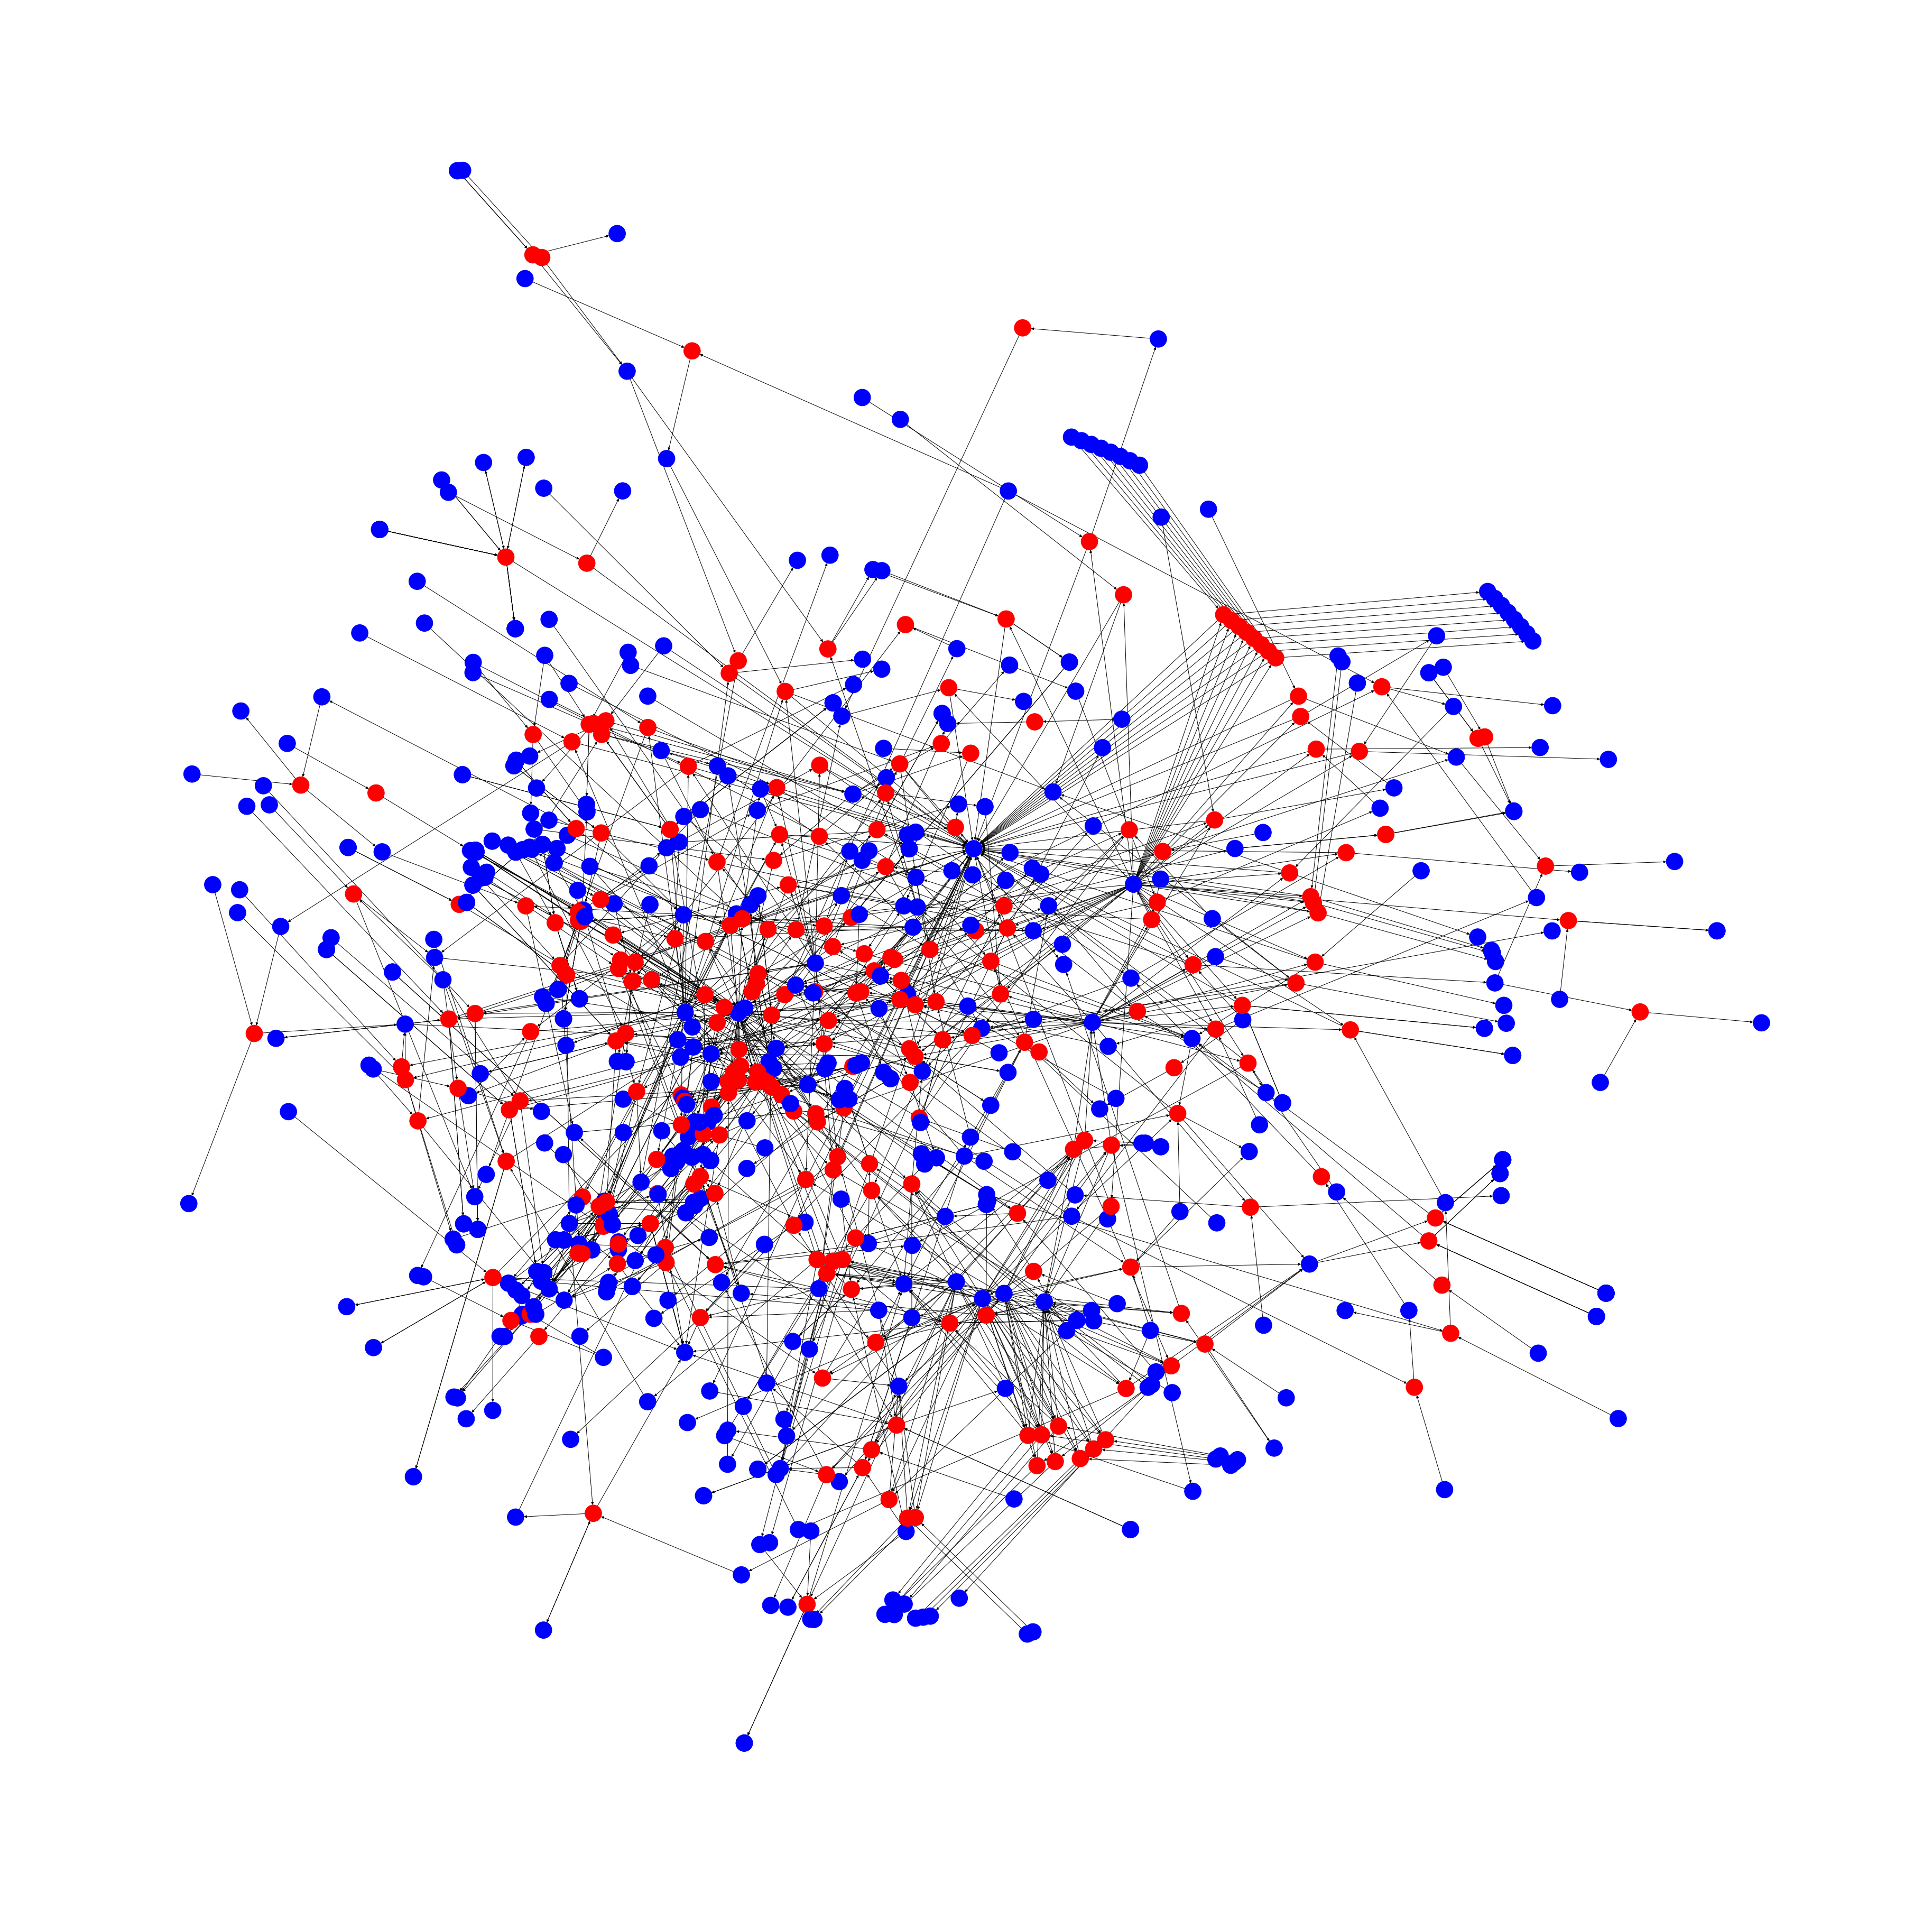

In [4]:

edges=pd.read_csv('Bipartita_'+o[0]+'.csv',index_col=0, delimiter=';')


edges['origen']=edges.index

edges.values
EDGES=[[edges[1],edges[0]] for edges in edges.values ]


G=nx.DiGraph()

G.add_edges_from(EDGES)


plt.figure(3,figsize=(50,50))

color=[]
for i in G.nodes:
    if 'EC' in i :
        color.append('red')     
    
    else:
        color.append('blue')
        
         
        
       


nx.draw_kamada_kawai(G , font_size=15,node_size=1000,node_color=color, with_labels=False)
plt.savefig('sai_com_bipartita.png')

In [31]:
liasas=[x for x in G.nodes  if 'EC:6' in x ]

In [32]:
Dif_grado_liasa= [G.out_degree(x)-G.in_degree(x) for x in liasas]

In [33]:
Dif_grado_liasa

[0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0]

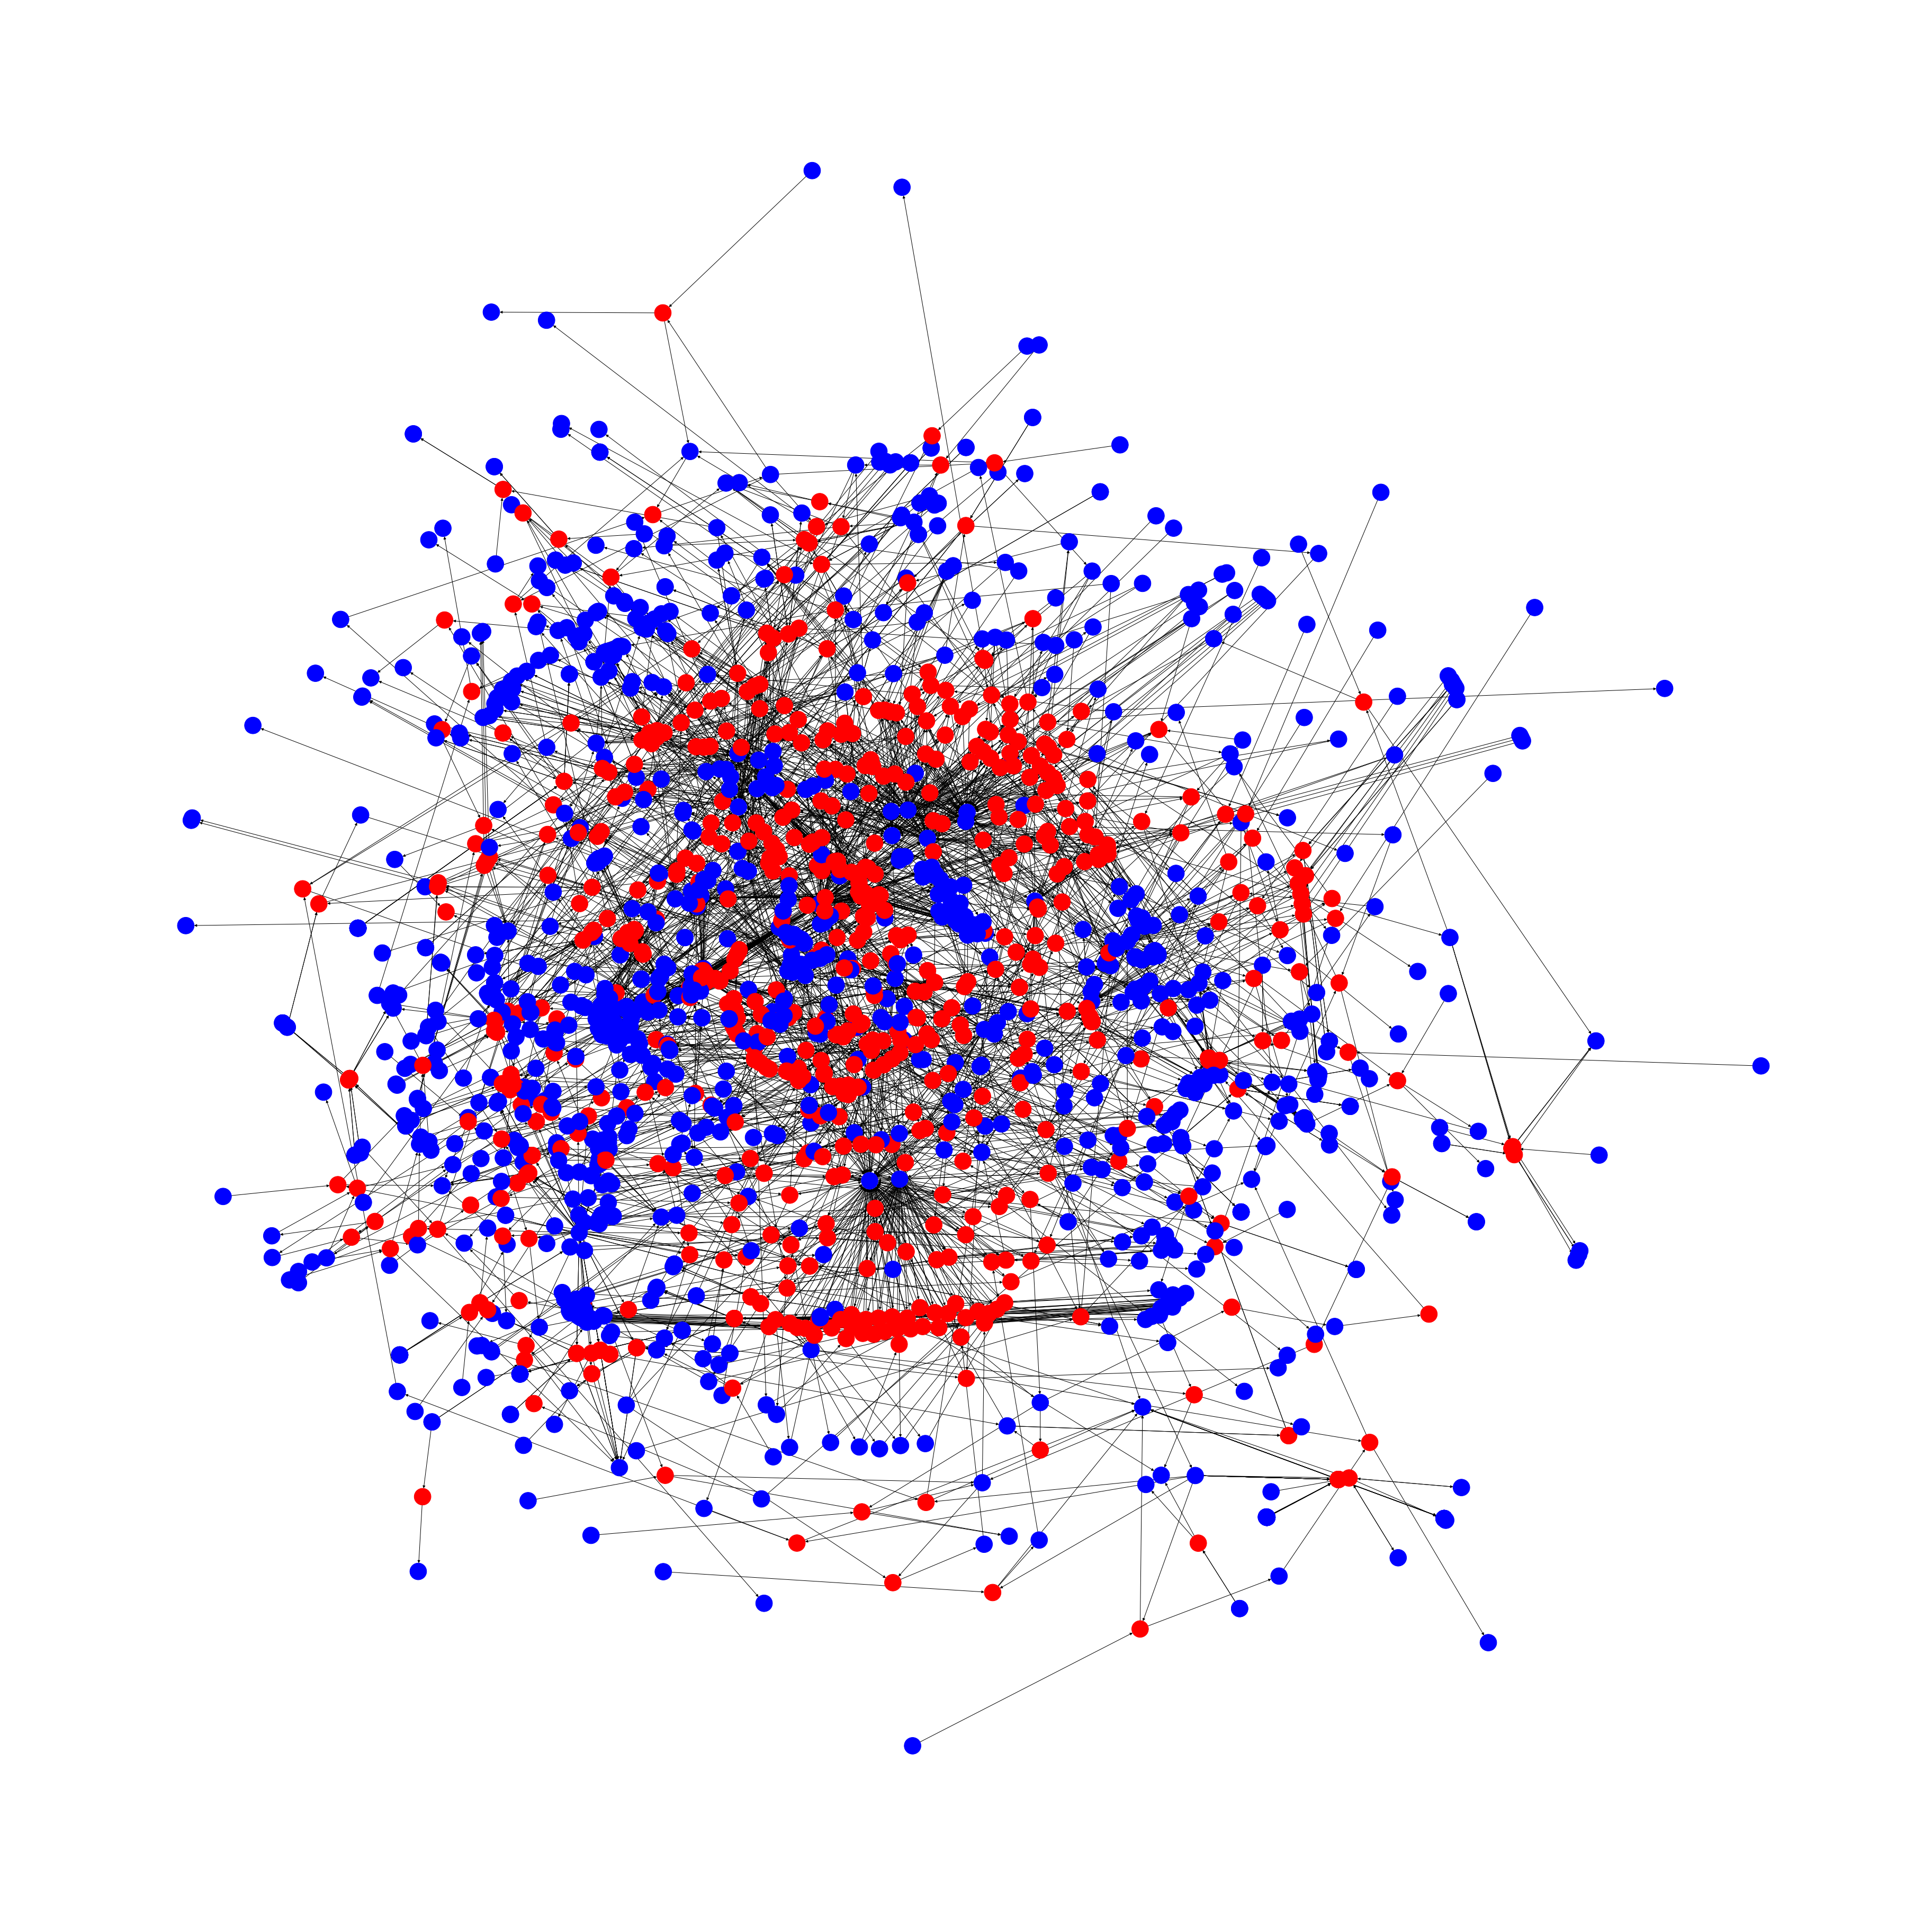

In [72]:
o=['hsa','01040']  


edges=pd.read_csv('Bipartita_'+o[0]+'.csv',index_col=0, delimiter=';')


edges['origen']=edges.index

edges.values
EDGESh=[[edges[1],edges[0]] for edges in edges.values ]


Gh=nx.DiGraph()

Gh.add_edges_from(EDGESh)


plt.figure(3,figsize=(50,50))

color=[]
for i in Gh.nodes:
    if 'EC' in i :
        color.append('red')     
    
    else:
        color.append('blue')
        
         
        
       


nx.draw_kamada_kawai(Gh , font_size=15,node_size=1000,node_color=color, with_labels=False)
#plt.savefig('hsa_com_bipartita.png')

In [62]:
liasas=[x for x in G.nodes  if 'EC:4.3.2.2' in x ]

Dif_grado_liasa= [G.in_degree(x)-G.out_degree(x) for x in liasas]

Dif_grado_liasa

X=[Dif_grado_liasa.count(i) for i in Dif_grado_liasa]

#plt.bar(Dif_grado_liasa,X)
enxx=[[i,G.out_degree(i),G.in_degree(i) ] for i in liasas ]
enxx=pd.DataFrame(enxx, columns=['enzima','in', 'out'])
enxx

enzima  in  out
0  EC:4.3.2.2   2    3

In [7]:
import keggpathx as kp

enzima='EC:4.1.1.50'


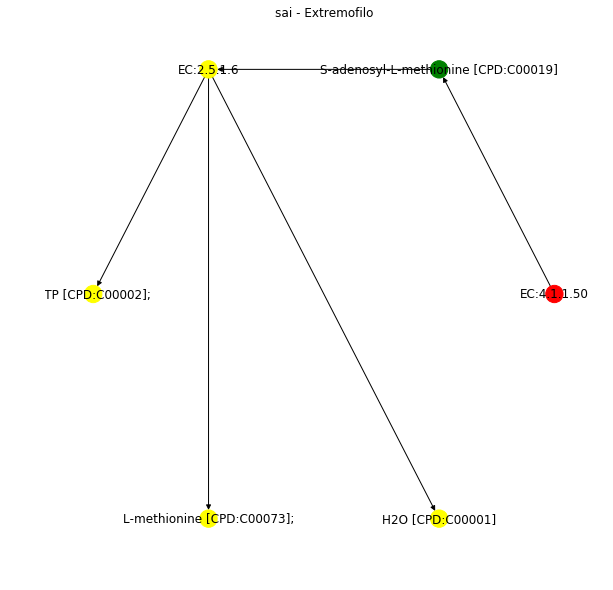

In [13]:
o=['dme','01040']  


edges=pd.read_csv('Bipartita_'+o[0]+'.csv',index_col=0, delimiter=';')


edges['origen']=edges.index

edges.values
EDGES=[[edges[1],edges[0]] for edges in edges.values ]


G=nx.DiGraph()


#enzima='UDP-glucose 4-epimerase [EC:5.1.3.2]'    
#enzima='methionyl-tRNA synthetase [EC:6.1.1.10]'
#enzima='triosephosphate isomerase (TIM) [EC:5.3.1.1]'


    
    
#df_in=kp.enzimas_in(EDGES,enzima)
df_out=kp.enzimas_out(EDGES,enzima)


#G.add_edges_from(df_in.values)
#for n in df_in.values:
#    df_in=kp.enzimas_in(EDGES,n[0])
#    G.add_edges_from(df_in.values)
#    for n in df_in.values:
#        df_in=kp.enzimas_in(EDGES,n[0])
#        G.add_edges_from(df_in.values)
    
    
G.add_edges_from(df_out.values)        
#for n in df_out.values:
#    df_in=kp.enzimas_in(EDGES,n[1])
#    G.add_edges_from(df_in.values)

nodes=[]



for i in G.nodes:
    nodes.append(i)



for n in df_out.values:      
    df_out=kp.enzimas_out(EDGES,n[1])
    G.add_edges_from(df_out.values) 
    
    df_in=kp.enzimas_in(EDGES,n[1])
    G.add_edges_from(df_in.values)
    
    for n in df_out.values:      
        df_out=kp.enzimas_out(EDGES,n[1])
        G.add_edges_from(df_out.values) 
#        for n in df_out.values:      
#            df_out=kp.enzimas_out(EDGES,n[1])
#            G.add_edges_from(df_out.values)
            
plt.figure(3,figsize=(10,10))
color=[]
for i in G.nodes:
    
    for j in nodes:
        
        if i == enzima: 
            color.append('red')
            break
        if i == j:
            color.append('green')
            break
        
     
    else:
        color.append('yellow')
        
         
       
plt.title('sai - Extremofilo')
nx.draw_circular(G,node_color=color , with_labels=True)
plt.savefig('sai')


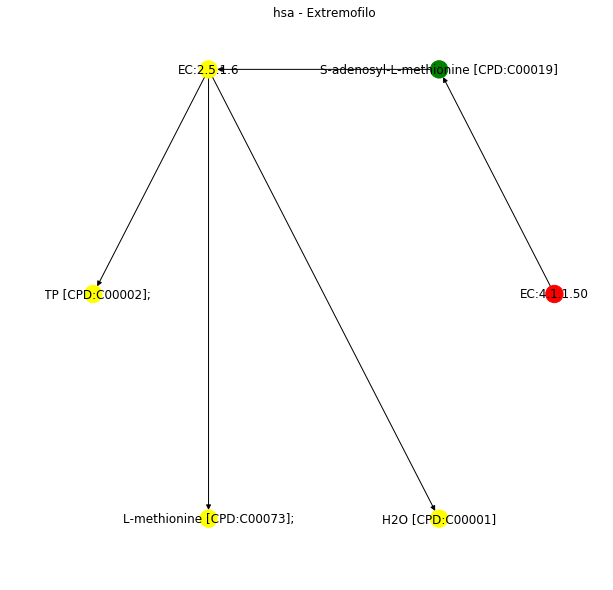

In [10]:
o=['hsa','01040']  


edges=pd.read_csv('Bipartita_'+o[0]+'.csv',index_col=0, delimiter=';')


edges['origen']=edges.index

edges.values
EDGESh=[[edges[1],edges[0]] for edges in edges.values ]


import keggpathx as kp
G=nx.DiGraph()


#enzima='UDP-glucose 4-epimerase [EC:5.1.3.2]'    
#enzima='methionyl-tRNA synthetase [EC:6.1.1.10]'
#enzima='triosephosphate isomerase (TIM) [EC:5.3.1.1]'

#enzima='EC:4.3.2.2'
    
    
#df_in=kp.enzimas_in(EDGES,enzima)
df_out=kp.enzimas_out(EDGESh,enzima)


#G.add_edges_from(df_in.values)
#for n in df_in.values:
#    df_in=kp.enzimas_in(EDGES,n[0])
#    G.add_edges_from(df_in.values)
#    for n in df_in.values:
#        df_in=kp.enzimas_in(EDGES,n[0])
#        G.add_edges_from(df_in.values)
    
    
G.add_edges_from(df_out.values)        
#for n in df_out.values:
#    df_in=kp.enzimas_in(EDGES,n[1])
#    G.add_edges_from(df_in.values)

nodes=[]



for i in G.nodes:
    nodes.append(i)



for n in df_out.values:      
    df_out=kp.enzimas_out(EDGESh,n[1])
    G.add_edges_from(df_out.values) 
    
    df_in=kp.enzimas_in(EDGESh,n[1])
    G.add_edges_from(df_in.values)
    
    for n in df_out.values:      
        df_out=kp.enzimas_out(EDGESh,n[1])
        G.add_edges_from(df_out.values) 
#        for n in df_out.values:      
#            df_out=kp.enzimas_out(EDGES,n[1])
#            G.add_edges_from(df_out.values)
            
plt.figure(3,figsize=(10,10))
color=[]
for i in G.nodes:
    
    for j in nodes:
        
        if i == enzima: 
            color.append('red')
            break
        if i == j:
            color.append('green')
            break
        
     
    else:
        color.append('yellow')
        
         
       
plt.title('hsa - Extremofilo')
nx.draw_circular(G,node_color=color , with_labels=True)
plt.savefig('hsa')

In [21]:
len(G.nodes)

846

In [173]:
x=[x for x in G.nodes if G.in_degree[x] == 0]

y=[y for y in G.nodes if G.out_degree[y] == 0]
len(x) , len(y) , len(EnzInter)

(231, 232, 267)

In [172]:
EnzInter=[i for i in G.nodes if G.in_degree[i] != 0 and  G.out_degree[i] != 0 and 'EC' in i  ]

CompInter=[i for i in G.nodes if G.in_degree[i] != 0 and  G.out_degree[i]!= 0 and 'EC' not in i ]

len(CompInter)
len(CompInter)/(len(CompInter)+len(x)+len(y))

0.2003454231433506

In [9]:
org=[#['sai','01100']]
     #['tac','01100']]
     #['eco','01040']]
     #['hsa','01040']]
     #['ptr','01040'],
     ['ath','01040']]
     #['mmu','01040']]
     #['cac','01100'],
     #['cel','01040'],
     #['dme','01040'],
     #['lma','01040'],
     #['sce','01040'],
     #['sfx','01040']]

for o in org:  
    nodos=[]
    for n in locals()['G_'+str(o[0])].nodes:
        nodos.append(n)
    
    NODOS=[]
    for N in nodos:
        n=N.replace('[','').replace(']','').find('EC')
        enz=N.replace('[','').replace(']','')[n:]
        NODOS.append([N,enz])
    #m=0
    #for i in NODOS:

    #print(NODOS[1][1])
    base = 'https://www.genome.jp/dbget-bin/www_bget?'
    comp = 'EC:2.3.1.9'
    url=base+comp
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

In [12]:
long=len(soup.tr.td.find_all('table')[3].find_all('td')[8].text.split('\n'))

for i in range(0,long-1):
    nomb=soup.tr.td.find_all('table')[3].find_all('td')[8].text.split('\n')[i]#.split('[')[0]
    print( comp , nomb )

long=len(soup.tr.td.find_all('table')[3].find_all('td')[9].text.split('\n'))
  
for i in range(0,long-1):
    nomb=soup.tr.td.find_all('table')[3].find_all('td')[9].text.split('\n')[i]#.split('[')[0]
    print( nomb, comp )
    



EC:2.3.1.9 acetyl-CoA [CPD:C00024];
EC:2.3.1.9 [acetyl-CoA C-acetyltransferase]-L-cysteine;
EC:2.3.1.9 [acetyl-CoA C-acetyltransferase]-S-acetyl-L-cysteine
CoA [CPD:C00010]; EC:2.3.1.9
acetoacetyl-CoA [CPD:C00332]; EC:2.3.1.9
[acetyl-CoA C-acetyltransferase]-S-acetyl-L-cysteine; EC:2.3.1.9
[acetyl-CoA C-acetyltransferase]-L-cysteine EC:2.3.1.9


# INTENTO SIN NOMBRE DE ENZIMA Y COMPUESTOS

In [12]:
os.getcwd()

os.chdir('/home/haku/Documentos/TESIS/PROYECTO/')

REDES

In [20]:
orga=[['sai','01100'],
      ['tac','01100'],
      ['eco','01040'],
      ['hsa','01040'],
      ['ptr','01040'],
      ['ath','01040'],
      ['mmu','01040'],
      ['cac','01100'],
      ['cel','01040'],
      ['dme','01040'],
      ['lma','01040'],
      ['sce','01040'],
      ['sfx','01040']]

#plt.figure(3,figsize=(17,10)) 
RelacionEnzimaPoducto=[]    
H=[]

for i in range(0, len(orga)):
    maxi=orga[i][1]
    org=orga[i][0]



    path=os.getcwd()
    os.chdir('Pathways/'+str(org))       #Cambia la ejecuicon del programa a otra carpeta. 
        ## Cargar archivos
        #print('Cual es el primer path por encima de 1000 para ',org)
        #maxi=input()
    ORGANISM = org

    pathways = requests.get('http://rest.kegg.jp/list/pathway/' + ORGANISM)  #lista de las vias metabolicas y otra informacion porpocionada por KEGG

    for line in pathways.text.split('\n'):         # Se recorre la lista propocionada por  KEGG donde se estraen los nombres de las vias de KEGG
        pathwayid = line.split('\t')[0].replace('path:', '') 
        A = pathwayid + ".xml"                  # Le ponemos la extencion .xml para poder cargar los archivos
        if A == str(org)+str(maxi)+'.xml':           
                break
        locals()[str(pathwayid)] = etree.parse(A) # Guarda los  XML con el nombre de la via asignado por KEGG
        locals()[str(pathwayid)] = locals()[str(pathwayid)].getroot()  # Para transformar todos lo XML en directorios de python
    
    os.chdir(path) 


    for line in pathways.text.split('\n'):        
        pathwayid = line.split('\t')[0].replace('path:', '') 
        
        if pathwayid == str(org)+str(maxi):           
            break
                
        ii=locals()[str(pathwayid)]
        
        locals()['NODES_'+str(pathwayid)]={}  #Este comando crea un directorio vacio.
        for i in range(0,len(ii)):
            if ii[i].tag=='entry':         
                A=ii[i].attrib            
                if A['type'] == 'gene' or 'group':
                        locals()['NODES_'+str(pathwayid)][A['id']]= A['name'] 
                
    
#-------------Construccion_RED_BIPARTITA-------------------------------

    edges=[]
    
    for line in pathways.text.split('\n'):        
        pathwayid = line.split('\t')[0].replace('path:', '') 
    
        if pathwayid == str(org)+str(maxi):          
                break
            
        ii=locals()[str(pathwayid)]
    
    
        NODES=locals()['NODES_'+str(pathwayid)]
        x=[ [ ii[i][j].attrib['name'] ,  NODES[ ii[i].attrib['id'] ] ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'substrate' ]
        y=[ [ NODES[ ii[i].attrib['id'] ] , ii[i][j].attrib['name']  ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'product' ]
    
        edges=x+y+edges
        
    GG=nx.DiGraph()

    GG.add_edges_from(edges)
    
    ENZIMAS=[i for i in GG.nodes if org in i]
    
    """ENTROPIA """
    size=[]
    d_in=GG.in_degree()
    d_out=GG.out_degree()
    for i in ENZIMAS:
        size.append(str( [d_in[i],d_out(i)] )  )
    p=[[ i ,size.count(i)] for i in size ]
    df=pd.DataFrame(p, columns=['tuplas','cont'])
    df=df.drop_duplicates(subset = 'tuplas')
    df['p']=df['cont']/len(ENZIMAS)
    df['H']=-df['p']*np.log(df['p'])
    suma=df['H'].sum()
    H.append([ org , suma ] )    
    """ ------ """
    
   
    """ 
    ## Distribución de diferencia de grado
    D=[] 
    d_in=GG.in_degree()
    d_out=GG.out_degree()
    for i in ENZIMAS: 
        D.append(d_out(i)-d_in(i))      
    P=[]
    X=[]
    for i in range(min(D)+1,max(D)+1):
        P.append(D.count(i)/len(D))
        X.append(i)
    plt.plot(X,P,'o',label= org , antialiased= True)    
    """ 
    
    compInter = [i for i in GG.nodes if GG.in_degree[i] != 0 and  GG.out_degree[i] != 0 and org not in i  ]
    
    x = [x for x in GG.nodes if GG.in_degree[x] == 0]
    y = [y for y in GG.nodes if GG.out_degree[y] == 0]
    
    
    
    
    RelacionEnzimaPoducto.append([org,
                                  len(compInter)/len(ENZIMAS),
                                  len(compInter)/(len(y)+len(compInter)+len(x)), 
                                  (len(y)+len(compInter)+len(x)) /len(ENZIMAS)  ])
 
#-----------Grafica_Redes_Bipartitas-----------------
"""
    plt.figure(3,figsize=(50,50))

    color=[]
    for i in GG.nodes:
        if org in i :
            color.append('red')     
    
        else:
            color.append('blue')
        
        
    nx.draw_kamada_kawai(GG , font_size=15,node_size=1000,node_color=color, with_labels=False)
    plt.savefig(org+'_bipartita.png')
    plt.show()
    
"""



"\n    plt.figure(3,figsize=(50,50))\n\n    color=[]\n    for i in GG.nodes:\n        if org in i :\n            color.append('red')     \n    \n        else:\n            color.append('blue')\n        \n        \n    nx.draw_kamada_kawai(GG , font_size=15,node_size=1000,node_color=color, with_labels=False)\n    plt.savefig(org+'_bipartita.png')\n    plt.show()\n    \n"

In [21]:
E=pd.DataFrame(H , columns=['org','H'] )
E.sort_values(by='H', ascending=False)

org         H
3   hsa  1.935227
4   ptr  1.923782
6   mmu  1.907413
10  lma  1.856934
5   ath  1.837129
8   cel  1.814602
9   dme  1.804691
11  sce  1.799561
1   tac  1.711871
0   sai  1.709240
12  sfx  1.611070
7   cac  1.588805
2   eco  1.582744

In [23]:
df.sort_values(by='cont', ascending=False)

tuplas  cont         p         H
0      [1, 1]   386  0.585736  0.313302
9      [2, 2]   107  0.162367  0.295167
21     [2, 1]    37  0.056146  0.161689
81     [3, 3]    27  0.040971  0.130898
8      [1, 2]    25  0.037936  0.124122
227    [2, 3]    12  0.018209  0.072944
31     [3, 2]    11  0.016692  0.068317
88     [4, 4]     9  0.013657  0.058637
60     [4, 3]     7  0.010622  0.048276
84     [3, 1]     4  0.006070  0.030983
120    [8, 8]     4  0.006070  0.030983
54     [3, 4]     3  0.004552  0.024547
244    [7, 7]     2  0.003035  0.017595
230    [5, 5]     2  0.003035  0.017595
154    [4, 2]     2  0.003035  0.017595
130    [6, 6]     2  0.003035  0.017595
115  [12, 11]     2  0.003035  0.017595
112  [11, 11]     2  0.003035  0.017595
35     [4, 5]     2  0.003035  0.017595
113  [10, 10]     1  0.001517  0.009849
147  [13, 13]     1  0.001517  0.009849
86     [1, 4]     1  0.001517  0.009849
163    [5, 4]     1  0.001517  0.009849
43     [2, 4]     1  0.001517  0.009849
22   [22, 29]     1  0.001517  0.009849
245   [10, 7]     1  0.001517  0.009849
263  [15, 17]     1  0.001517  0.009849
264    [5, 9]     1  0.001517  0.009849
287   [9, 10]     1  0.001517  0.009849
362    [8, 7]     1  0.001517  0.009849
379    [6, 7]     1  0.001517  0.009849
511  [12, 12]     1  0.001517  0.009849

In [19]:
df=pd.DataFrame(RelacionEnzimaPoducto, columns= ['org','%pi/E','%pi/P', '%P/E' , ] )
df.sort_values(by='%pi/E', ascending=False)    

org     %pi/E     %pi/P      %P/E
3   hsa  0.970166  0.578774  1.676243
4   ptr  0.970166  0.580688  1.670718
6   mmu  0.960586  0.578697  1.659910
9   dme  0.942275  0.523091  1.801358
5   ath  0.940449  0.570552  1.648315
8   cel  0.914815  0.493506  1.853704
11  sce  0.888060  0.557377  1.593284
10  lma  0.875000  0.427083  2.048780
7   cac  0.825991  0.504711  1.636564
12  sfx  0.810319  0.534535  1.515933
2   eco  0.789757  0.547664  1.442049
0   sai  0.776786  0.369165  2.104167
1   tac  0.701439  0.351986  1.992806

In [56]:
RelacionEnzimaPoducto

[['sai', 0.5803571428571429],
 ['tac', 0.7014388489208633],
 ['eco', 0.2628032345013477],
 ['hsa', 0.2154696132596685],
 ['ptr', 0.2154696132596685],
 ['ath', 0.21910112359550563],
 ['mmu', 0.2195945945945946]]

In [17]:
#edges=[]
    
#for line in pathways.text.split('\n'):        
#    pathwayid = line.split('\t')[0].replace('path:', '') 
    
#    if pathwayid == str(org)+str(maxi):          
#            break
            
#    ii=locals()[str(pathwayid)]
    
    
#    NODES=locals()['NODES_'+str(pathwayid)]
#    x=[ [ ii[i][j].attrib['name'] ,  NODES[ ii[i].attrib['id'] ] ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'substrate' ]
#    y=[ [ NODES[ ii[i].attrib['id'] ] , ii[i][j].attrib['name']  ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'product' ]
    
#    edges=x+y+edges
    

In [35]:
edges

GG=nx.DiGraph()

GG.add_edges_from(edges)

plt.figure(3,figsize=(50,50))

color=[]
for i in GG.nodes:
    if org in i :
        color.append('red')     
    
    else:
        color.append('blue')
        
        
#nx.draw_kamada_kawai(GG , font_size=15,node_size=1000,node_color=color, with_labels=False)
#plt.savefig('mmu_bipartita.png')

<Figure size 3600x3600 with 0 Axes>

In [33]:
#noin=[x for x in GG.nodes if org  in x ]
#noin

In [36]:
EnzInter = [i for i in GG.nodes if GG.in_degree[i] != 0 and  GG.out_degree[i] != 0 and org not in i  ]

x = [x for x in GG.nodes if GG.in_degree[x] == 0]

y = [y for y in GG.nodes if GG.out_degree[y] == 0]

print(len(x) , len(y) , len(EnzInter))

(len(EnzInter))/(len(x) + len(y) + len(EnzInter))

180 179 195


0.351985559566787

In [40]:
len(EnzInter)/len(NODES) 

1.652542372881356

<BarContainer object of 890 artists>

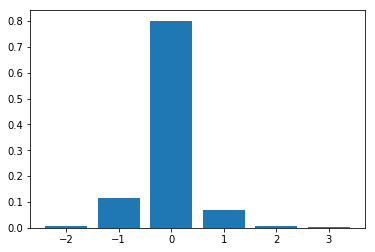

In [32]:
grado=[GG.out_degree(i)-GG.in_degree(i) for i in GG.nodes if org in i ]
cont=[grado.count(i)/len(grado) for i in grado]

plt.bar(grado,cont)

In [ ]:
grado=[GG.out_degree(i)-GG.in_degree(i) for i in GG.nodes if 'cpd' not in i ]
cont=[grado.count(i) for i in grado]

plt.bar(grado,cont)

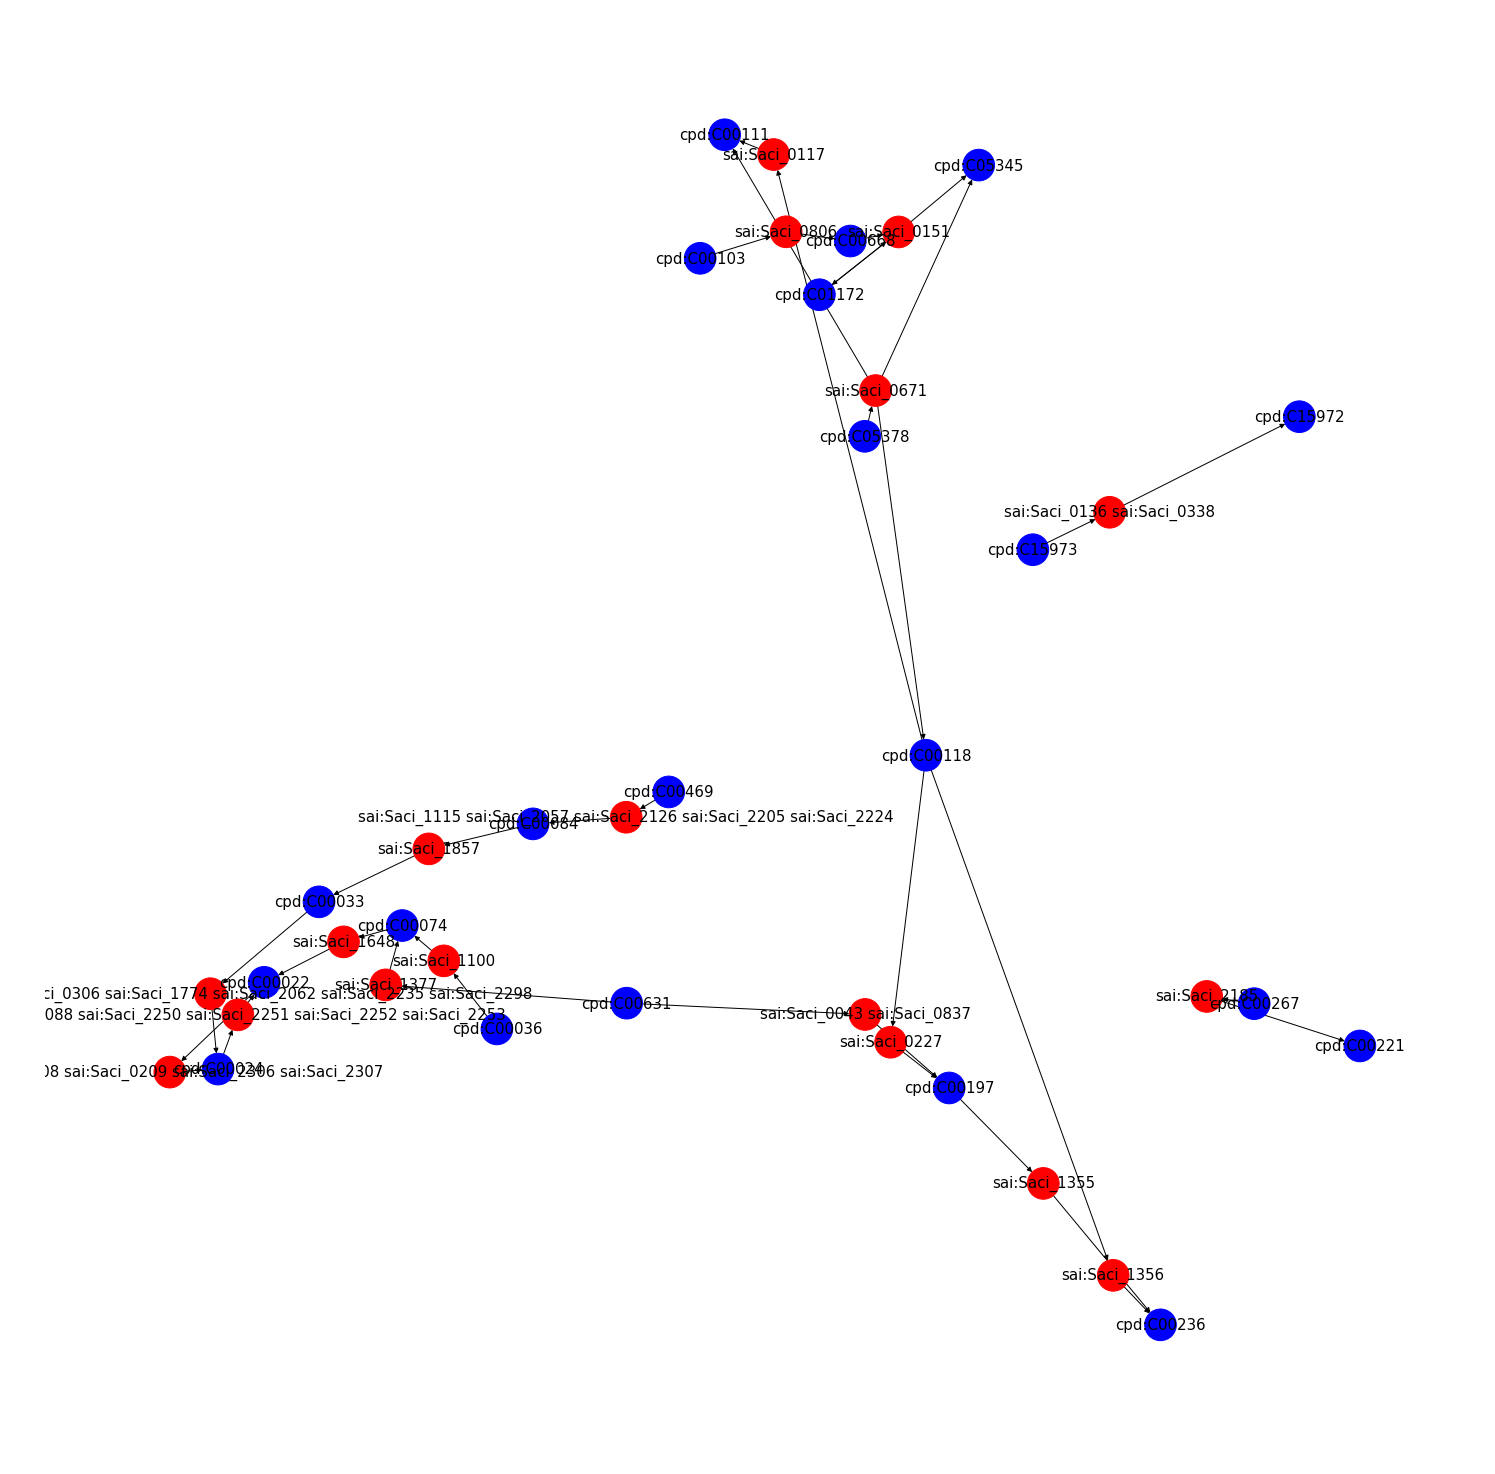

In [145]:
ii=sai00010
edges=[]

x=[ [ ii[i][j].attrib['name'] ,  NODES_sai00010[ ii[i].attrib['id'] ] ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'substrate' ]
y=[ [ NODES_sai00010[ ii[i].attrib['id'] ] , ii[i][j].attrib['name']  ]  for i in range(0,len(ii) ) if ii[i].tag == 'reaction' for j in range(0,len(ii[i])) if ii[i][j].tag == 'product' ]

edges=x+y+edges

GG=nx.DiGraph()

GG.add_edges_from(edges)

plt.figure(3,figsize=(20,20))

color=[]
for i in GG.nodes:
    if 'cpd' in i :
        color.append('blue')     
    
    else:
        color.append('red')
        
        
nx.draw(GG , font_size=15,node_size=1000,node_color=color, with_labels=True)        
        